# 수치 미분

## 밑의 코드 개선점 2가지
+ <h3>1e-50은 반올림 오차문제를 일으킴 -> 작은 값(ex. 가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생김</h3>
+ <h3>함수 f의 차분과 관련된 것. '진정한 미분'은 x 위치의 접선의 기울기에 해당</h3>
    <span style="color:red">하지만 밑의 코드의 미분은 (x+h)-h 사이의 기울기에 해당</span>


In [4]:
# 나쁜 구현 예
import numpy as np

# 인수 f: 함수f
# 인수 x: 함수f에 넘길 인수x
def numerical_diff(f, x):
    h = 1e-50  #h를 0으로 무한히 가깝게 하고싶으니 1e-50이라는 작은 값 이용 --> 0.00.....1(소수점 아래 0 50개)
    return (f(x +h) - f(x)) / h


# 1e-50은 반올림 오차문제를 일으킴 -> 작은 값(ex. 가령 소수점 8자리 이하)이 생략되어 최종 계산 결과에 오차가 생김
np.float32(1e-50)  # 첫 번째 개선 포인트
# 두 번째 개선은 함수f의 차분과 관련된 것
# '진정한 미분'은 x 위치의 접선의 기울기에 해당
# 이번 구현에서의 미분은 (X+h)-x 사이의 기울기에 해당

0.0

## 위의 코드에서 2가지 개선 후

In [3]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

# 수치 미분의 예

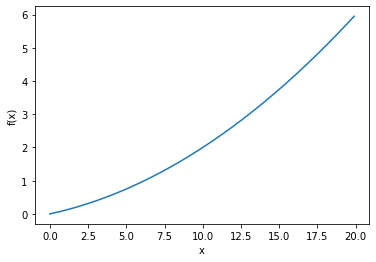

In [4]:
import numpy as np
import matplotlib.pylab as plt

def function_1(x):
    return 0.01*x**2 + 0.1*x

x = np.arange(0.0, 20.0, 0.1) 
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [6]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [14]:
def tangent_line(f, x):
    d = numerical_diff(f,x)
    print(d)
    y = f(x)-d*x
    return lambda a: d*a +y

0.1799999999996249


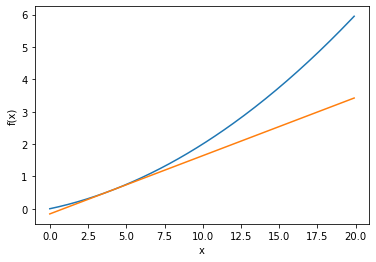

In [15]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 4)
y2 = tf(x)


plt.plot(x, y)
plt.plot(x, y2)
plt.show()

# 편미분

In [17]:
# 인수 x는 넘파이 배열
# x0^2 + x1^2
def function_2(x):
    return x[0]**2 + x[1]**2
    # 또는 return np.sum(x**2)

## x0 = 3, x1 = 4
## x0에 대한 편미분 구하기

In [19]:
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0 
numerical_diff(function_tmp1, 3.0)

6.00000000000378

## x1에 대한 편미분 구하기

In [20]:
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1*x1
numerical_diff(function_tmp2, 4)

7.999999999999119

# 기울기
## 모든 변수의 편미분을 벡터로 정리한 것

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)   # x와 형상이 같은 배열을 생성
    print("x.size: ", x.size)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad

In [33]:
numerical_gradient(function_2, np.array([3.0,4.0]))

x.size:  2


array([6., 8.])

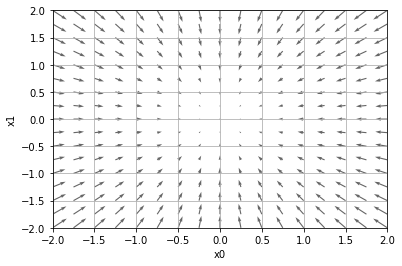

In [35]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
#     plt.legend()
    plt.draw()
    plt.show()

# 기울기는 각 지점에서 낮아지는 방향을 가르킴
<h1><span style="color:red"> 기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향 </span></h1>